# Convolutional Neural Network

## Preparing environment

In [16]:
import tensorflow as tf
print(tf.__version__)
#Check for GPU availability
print("GPU", "Available YES!" if tf.config.list_physical_devices("GPU") else "Not available :(") 
# If not available we need to change configs at Runtime > Change Runtime Type and select GPU.

2.2.0-rc4
GPU Available YES!


## Part 1 - Data Preprocessing
Using a test/traning set of 10000 images of cats and dogs we will use a trick to generate more images using Keras data augmentation in order to increase our accuracy by training our CNN over more examples, so we need to:
 * Generate images for training set
 * Generate images for test set
 * Create the training set
 * Create the test set
 

In [1]:
from keras.preprocessing.image import ImageDataGenerator

INPUT_SIZE=128

# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, #Simple distortion 
                                   zoom_range = 0.2, #Little zooming
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('drive/My Drive/ML - AZ Course/Data/dataset/training_set',
                                                 target_size = (INPUT_SIZE, INPUT_SIZE),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Creating the Test set
test_set = test_datagen.flow_from_directory('drive/My Drive/ML - AZ Course/Data/dataset/test_set',
                                            target_size = (INPUT_SIZE, INPUT_SIZE),
                                            batch_size = 32,
                                            class_mode = 'binary')


Using TensorFlow backend.


Found 8010 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input

INPUT_SHAPE = [INPUT_SIZE, INPUT_SIZE, 3] # Image width, length and number of color channels

# Initialising the CNN
cnn = Sequential()
cnn.add(Input(shape=INPUT_SHAPE))
# Step 1 - Convolution
cnn.add(Conv2D(filters=64, kernel_size=3, padding="same",
                activation="relu", input_shape=INPUT_SHAPE))

# Step 2 - Pooling
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))

# Adding a second pooling
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
# Adding a third convolutional layer
cnn.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))

# Adding a third pooling
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.2))

# Step 5 - Output Layer
cnn.add(Dense(units=1, activation='sigmoid'))

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

# Part 3 - Training the CNN
Compile CNN using Adam optimizer and a Binary Cross Entropy function since we are trying to predict a binary outcome.

In [0]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [67]:
%%time
# Training the CNN on the Training set and evaluating it on the Test set
hist = cnn.fit(training_set,
              steps_per_epoch = 250,
              epochs = 20,
              validation_data = test_set,
              validation_steps = 63,
              callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 68s 274ms/step - loss: 0.7050 - accuracy: 0.5547 - val_loss: 0.6627 - val_accuracy: 0.5920
Epoch 2/20
250/250 [==============================] - 67s 270ms/step - loss: 0.6438 - accuracy: 0.6262 - val_loss: 0.6203 - val_accuracy: 0.6565
Epoch 3/20
250/250 [==============================] - 68s 273ms/step - loss: 0.5874 - accuracy: 0.6923 - val_loss: 0.6024 - val_accuracy: 0.6585
Epoch 4/20
250/250 [==============================] - 69s 275ms/step - loss: 0.5459 - accuracy: 0.7220 - val_loss: 0.6181 - val_accuracy: 0.6670
Epoch 5/20
250/250 [==============================] - 69s 276ms/step - loss: 0.4950 - accuracy: 0.7623 - val_loss: 0.4522 - val_accuracy: 0.7870
Epoch 6/20
250/250 [==============================] - 69s 277ms/step - loss: 0.4635 - accuracy: 0.7761 - val_loss: 0.4651 - val_accuracy: 0.7940
Epoch 7/20
250/250 [==============================] - 69s 274ms/step - loss: 0.4460 - accuracy: 0.7873 - val_loss: 0.4909 - val_ac

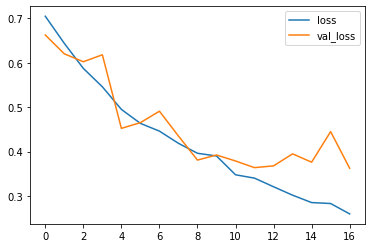

In [68]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend();

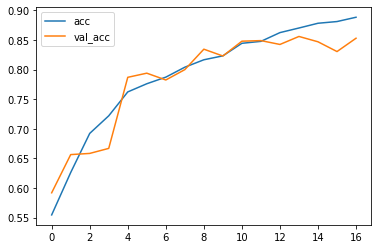

In [69]:
# Plot accuracy per iteration
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend();

In [0]:
import os
import datetime

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [72]:
save_model(cnn, "conv_relu_sigm_adam_good")

Saving model to: drive/My Drive/Data/models/20200509-02321588991558-conv_relu_sigm_adam_good.h5...


'drive/My Drive/Data/models/20200509-02321588991558-conv_relu_sigm_adam_good.h5'

In [0]:
cnn_loaded = tf.keras.models.load_model("drive/My Drive/Data/models/20200509-02321588991558-conv_relu_sigm_adam_good.h5")

In [74]:
# Creating the Test data to predict
test_data = test_datagen.flow_from_directory('drive/My Drive/ML - AZ Course/Data/dataset/test_image',
                                            target_size = (INPUT_SIZE, INPUT_SIZE),
                                            batch_size = 19,
                                            class_mode = 'binary')

Found 19 images belonging to 2 classes.


In [0]:
%%time
predictions = cnn.predict(test_data, verbose=1).argmax(axis=1)

   1755/Unknown - 2300s 1s/step